In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_excel('/content/iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
iris_data = data.copy()
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Find the missing values

In [22]:
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## Fill the Nan Values

In [23]:
col = iris_data[['SL','SW', 'PL']]
for i in col:
  iris_data[i]= iris_data[i].fillna(iris_data[i].median())

In [24]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [25]:
iris_data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [26]:
iris_data.duplicated().sum()

3

In [27]:
iris_data.drop_duplicates(inplace=True)
iris_data['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Classification, dtype: int64

## Handling Outlers

Text(0.5, 1.0, 'Numerical Iris Data')

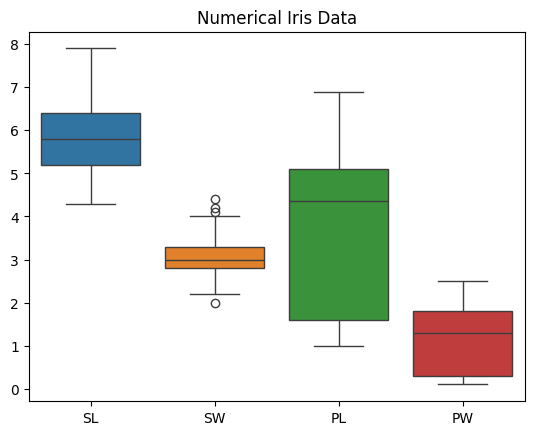

In [28]:
  sns.boxplot(iris_data)
  plt.title('Numerical Iris Data')

In [29]:
Q1=np.percentile(iris_data['SW'],25,method='midpoint')
Q3=np.percentile(iris_data['SW'],75,method='midpoint')

print('Q1:',Q1)
print('Q3:  ', Q3)

Q1: 2.8
Q3:   3.3


In [30]:
IQR = Q3-Q1
print('IQR:', IQR)

IQR: 0.5


In [34]:
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR

print('lower whisker: ',lower_lim)
print('upper whisker: ',upper_lim)

outlier=[]
for x in iris_data['SW']:
  if( (x < upper_lim) or (x > upper_lim)):
    outlier.append(x)
print('Outliers: ', outlier)

lower whisker:  2.05
upper whisker:  4.05
Outliers:  [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.0, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.0, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.2, 3.5, 3.0, 3.4, 3.5, 2.3, 3.2, 3.0, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 3.0, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 3.0, 2.8, 3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.0, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0]


In [36]:
#Clipping method
iris_data['SW'] = iris_data['SW'].clip(lower=lower_lim, upper=upper_lim)
outlier=[]
for x in iris_data['SW']:
  if( (x < lower_lim) or (x > upper_lim)):
    outlier.append(x)
print(outlier)

[]


Text(0.5, 1.0, 'Numerical Iris Data')

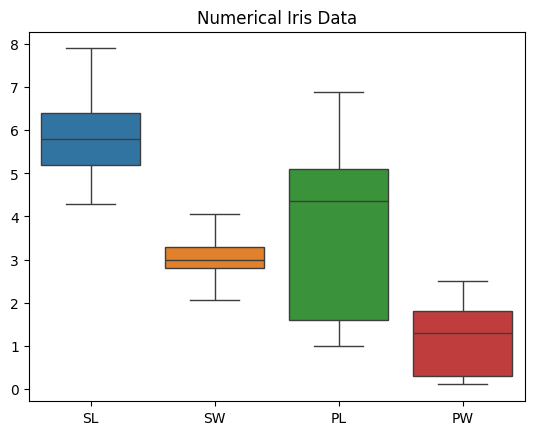

In [37]:
  sns.boxplot(iris_data)
  plt.title('Numerical Iris Data')

In [38]:
#Use LabelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
iris_data['Classification'] = le.fit_transform(iris_data['Classification'])
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


In [40]:
data_corr = iris_data.groupby('Classification').corr()
data_corr

SL        SW        PL        PW
Classification                                           
0              SL  1.000000  0.594591 -0.081542  0.249997
               SW  0.594591  1.000000 -0.003721  0.170691
               PL -0.081542 -0.003721  1.000000 -0.003328
               PW  0.249997  0.170691 -0.003328  1.000000
1              SL  1.000000  0.453838  0.734325  0.518523
               SW  0.453838  1.000000  0.497031  0.659486
               PL  0.734325  0.497031  1.000000  0.771257
               PW  0.518523  0.659486  0.771257  1.000000
2              SL  1.000000  0.407790  0.757025  0.213207
               SW  0.407790  1.000000  0.241177  0.535405
               PL  0.757025  0.241177  1.000000  0.193369
               PW  0.213207  0.535405  0.193369  1.000000

<Axes: ylabel='Classification-None'>

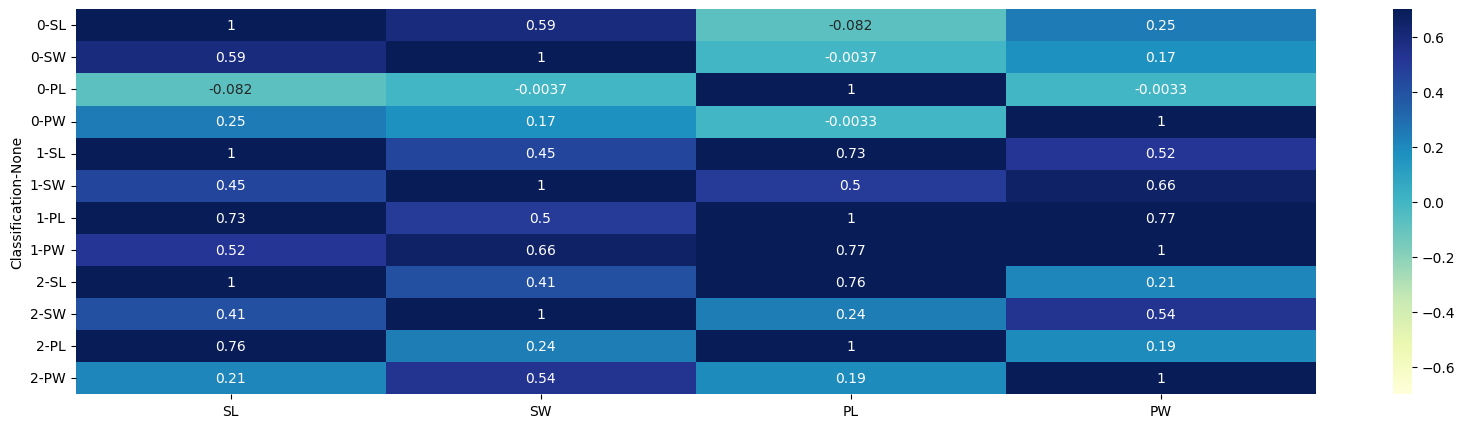

In [45]:
# Find the correlation using heatmap
plt.subplots(figsize =(20,5))
sns.heatmap(data_corr, vmin = -0.7, vmax = 0.7, annot = True, cmap = 'YlGnBu')

## Classification Models

In [46]:
#Identify the target and feature variable
y = iris_data['Classification']
X = iris_data.drop('Classification', axis = 1)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score,confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = .25)

## Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_model = log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_log_pred = log_reg.predict(X_test)
y_log_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2])

In [55]:
acc_log = accuracy_score(y_test,y_log_pred)
pre_log = precision_score(y_test,y_log_pred, average='weighted')
re_log = recall_score(y_test,y_log_pred, average='weighted')
f1_log = f1_score(y_test,y_log_pred, average='weighted')

In [56]:
acc_log

0.918918918918919

## Scaled Logistic Model

In [57]:
# Here the accuracy is 0.918 due to the error occured at /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

# Increase the number of iterations (max_iter) or scale the data as shown in:
 #   https://scikit-learn.org/stable/modules/preprocessing.html
# Please also refer to the documentation for alternative solver options:
 #   https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  # n_iter_i = _check_optimize_result(

# Hence Logistic Scaling will be done
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fitting scaler on train and test data and transforming it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_model = log_reg.fit(X_train_scaled,y_train)
y_log_pred = log_reg.predict(X_test_scaled)
y_log_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2])

In [77]:
acc_log_sc = accuracy_score(y_test,y_log_pred)
pre_log_sc = precision_score(y_test,y_log_pred, average='weighted')
re_log_sc = recall_score(y_test,y_log_pred, average='weighted')
f1_log_sc = f1_score(y_test,y_log_pred, average='weighted')

In [78]:
print('Accuracy: ',acc_log)
print('Precision: ',pre_log)
print('Recall: ',re_log)
print('F1: ',f1_log)

Accuracy:  0.972972972972973
Precision:  0.9749034749034748
Recall:  0.972972972972973
F1:  0.9727622359201307


## KNN Model

Text(0, 0.5, 'KNN Accuracy')

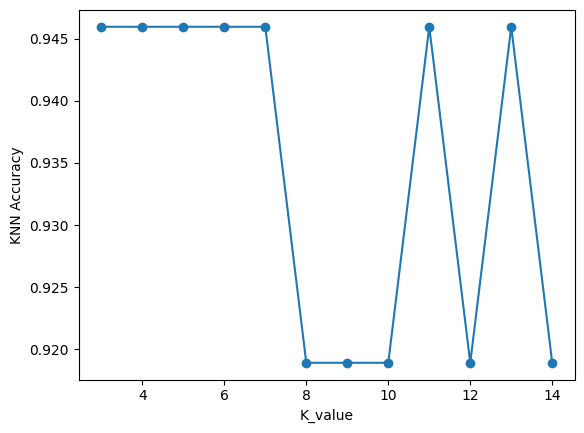

In [62]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
  classifier.fit(X_train,y_train)
  y_pred_knn  =classifier.predict(X_test)
  accuracy_knn =  accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('KNN Accuracy')

In [64]:
classifier = KNeighborsClassifier(n_neighbors = 4 ,metric = 'minkowski',p = 2)
classifier.fit(X_train,y_train)
y_knn_pred  =classifier.predict(X_test)

In [68]:
acc_knn = accuracy_score(y_test,y_knn_pred)
pre_knn = precision_score(y_test,y_knn_pred, average='weighted')
re_knn = recall_score(y_test,y_knn_pred, average='weighted')
f1_knn = f1_score(y_test,y_knn_pred, average='weighted')

In [69]:
print('Accuracy: ',acc_knn)
print('Precision: ',pre_knn)
print('Recall: ',re_knn)
print('F1: ',f1_knn)

Accuracy:  0.9459459459459459
Precision:  0.9459459459459459
Recall:  0.9459459459459459
F1:  0.9459459459459459


## Scaled KNN Model

Text(0, 0.5, 'KNN Accuracy')

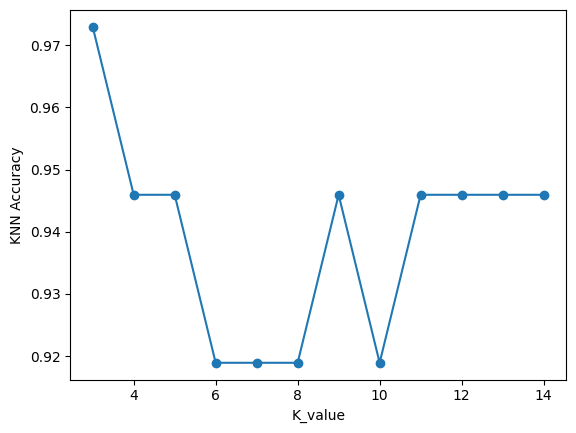

In [70]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski',p = 2)
  knn_model = classifier.fit(X_train_scaled,y_train)
  y_pred_knn  =classifier.predict(X_test_scaled)
  accuracy_knn =  accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy_knn)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('KNN Accuracy')

In [71]:
classifier = KNeighborsClassifier(n_neighbors = 1 ,metric = 'minkowski',p = 2)
classifier.fit(X_train_scaled,y_train)
y_pred_knn  =classifier.predict(X_test_scaled)

In [73]:
acc_knn_sc = accuracy_score(y_test,y_pred_knn)
pre_knn_sc = precision_score(y_test,y_pred_knn, average='weighted')
re_knn_sc = recall_score(y_test,y_pred_knn, average='weighted')
f1_knn_sc = f1_score(y_test,y_pred_knn, average='weighted')

In [74]:
print('Accuracy: ',acc_knn_sc)
print('Precision: ',pre_knn_sc)
print('Recall: ',re_knn_sc)
print('F1: ',f1_knn_sc)

Accuracy:  0.972972972972973
Precision:  0.9749034749034748
Recall:  0.972972972972973
F1:  0.9727622359201307


Compared the KNN model and Scaled KNN model, the model with 0.97297 gave good accuracy result

## Decision Tree Model

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt_cl = DecisionTreeClassifier()
dt_model = dt_cl.fit(X_train,y_train)

In [82]:
y_dt_pred = dt_cl.predict(X_test)
y_dt_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2])

In [79]:
acc_dt = accuracy_score(y_test,y_dt_pred)
pre_dt = precision_score(y_test,y_dt_pred, average='weighted')
re_dt = recall_score(y_test,y_dt_pred, average='weighted')
f1_dt = f1_score(y_test,y_dt_pred, average='weighted')

In [80]:
print('Accuracy: ',acc_dt)
print('Precision: ',pre_dt)
print('Recall: ',re_dt)
print('F1: ',f1_dt)

Accuracy:  0.918918918918919
Precision:  0.9215806715806715
Recall:  0.918918918918919
F1:  0.9192277992277991


## Random Forest Model

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier()
rf_model = rf_cl.fit(X_train,y_train)

In [83]:
y_rf_pred = rf_cl.predict(X_test)
y_rf_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2])

In [84]:
acc_rf = accuracy_score(y_test,y_rf_pred)
pre_rf = precision_score(y_test,y_rf_pred, average='weighted')
re_rf = recall_score(y_test,y_rf_pred, average='weighted')
f1_rf = f1_score(y_test,y_rf_pred, average='weighted')

In [85]:
print('Accuracy: ',acc_rf)
print('Precision: ',pre_rf)
print('Recall: ',re_rf)
print('F1: ',f1_rf)

Accuracy:  0.9459459459459459
Precision:  0.9459459459459459
Recall:  0.9459459459459459
F1:  0.9459459459459459


For Decision Tree and Random Forest for scaling and non-scaling, the accuracy values remains the same

## SVM Model

In [98]:
#Linear Kernal
from sklearn.svm import SVC
sv_lin= SVC(kernel='linear')
svm_model = sv_lin.fit(X_train,y_train)
y_lin_pred = sv_lin.predict(X_test)

In [99]:
acc_sv_lin = accuracy_score(y_test,y_lin_pred)
print('Accuracy: ',acc_sv_lin)

Accuracy:  0.972972972972973


In [100]:
#Polynomial Kernal
from sklearn.svm import SVC
sv_poly= SVC(kernel='poly')
svm_model = sv_poly.fit(X_train,y_train)
y_poly_pred = sv_poly.predict(X_test)

In [101]:
acc_sv_poly= accuracy_score(y_test,y_poly_pred)
print('Accuracy: ',acc_sv_poly)

Accuracy:  0.9459459459459459


In [103]:
#RBF Kernal
from sklearn.svm import SVC
sv_rbf= SVC(kernel='rbf')
svm_model = sv_rbf.fit(X_train,y_train)
y_rbf_pred = sv_rbf.predict(X_test)

In [104]:
acc_sv_rbf= accuracy_score(y_test,y_rbf_pred)
print('Accuracy: ',acc_sv_rbf)

Accuracy:  0.918918918918919


Out of three kernals, Linear kernal gives the best accuracy with accuracy of 0.9729 compared to poly and rbf

In [93]:
pre_sv_lin = precision_score(y_test,y_lin_pred, average='weighted')
re_sv_lin = recall_score(y_test,y_lin_pred, average='weighted')
f1_sv_lin = f1_score(y_test,y_lin_pred, average='weighted')

In [95]:
print('Accuracy: ',acc_sv_lin)
print('Precision: ',pre_sv_lin)
print('Recall: ',re_sv_lin)
print('F1: ',f1_sv_lin)

Accuracy:  0.972972972972973
Precision:  0.9749034749034748
Recall:  0.972972972972973
F1:  0.9727622359201307


## Cross Validation Score

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(n_splits =10)

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
cv_log = cross_val_score(log_model,X,y,cv = stratified_cv)
cv_knn = cross_val_score(knn_model,X,y,cv = stratified_cv)
cv_dt= cross_val_score(dt_model,X,y,cv = stratified_cv)
cv_rf = cross_val_score(rf_model,X,y,cv = stratified_cv)
cv_svm = cross_val_score(svm_model,X,y,cv = stratified_cv)

In [107]:
# Mean CV Scores
mean_cv_log = cv_log.mean()
mean_knn_cv = cv_knn.mean()
mean_dt_cv = cv_dt.mean()
mean_rf_cv = cv_rf.mean()
mean_svm_cv = cv_svm.mean()

## Table of all Classification Model Scores

In [114]:
Accuracy = pd.DataFrame({'Models': ['Scaled Logistic Regression', 'Scaled KNN','Decision Tree', 'Random Forest','SVM_Linear'],
                         'Accuracies':[acc_log_sc,acc_knn_sc,acc_dt,acc_rf,acc_sv_lin]})

cv_scores = pd.DataFrame({'Models':['Scaled Logistic Regression','Scaled KNN','Decision Tree','Random Forest','SVM_Linear'],'Mean CV Scores':[mean_cv_log, mean_knn_cv, mean_dt_cv, mean_rf_cv, mean_svm_cv]})


In [115]:
pd.merge(Accuracy,cv_scores,on = 'Models')

,Models,Accuracies,Mean CV Scores
0,Scaled Logistic Regression,0.972973,0.938571
1,Scaled KNN,0.972973,0.951905
2,Decision Tree,0.918919,0.952857
3,Random Forest,0.945946,0.966667
4,SVM_Linear,0.972973,0.945238


Here the five models Logistic Regression(with and without scaling), KNN(with and without scaling), Decision Tree, Random Forest and SVM(linear, poly and rbf) are builded:

1. The accuracy  scores of all the five models are above 90%. The accuracy of Scaled Logistic Regression, Scaled KNN and SVM_Linear are in same score.

2. For the cross validation scores, all the mean cv scores are above 93%.

According to scores:
Random Forest > Decision Tree > Scaled KNN > SVM_Linear > Scaled Logistic Regression